### Malicious Website Analysis

__6 numerical and categorical variables below.__

__TYPE__: this is a categorical variable, its values represent the type of web page analyzed, specifically, 
1 is for malicious websites and 0 is for benign websites.

__URL_LENGTH__: it is the number of characters in the URL.

__CHARSET__: it is a categorical value and its meaning is the character encoding standard (also called character set).

__CONTENT_LENGTH__: it represents the content size of the HTTP header.

__APP_BYTES__: this is the number of bytes transfered

__SOURCE_APP_PACKETS__: packets sent from the honeypot to the server.

__REMOTE_APP_PACKETS__: packets received from the server.






In [242]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Callable, List

class rawData:
    def __init__(self, filename):
        self.filename = filename
    @staticmethod    
    def validate(self):
        try:
            if self.filename.endswith('.csv') is True:
                return True
            else:
                return ("please make sure you have right file extension")
        except Exception as e:
               return e
    def readData(self):
        try:
            data = self.validate(self.filename)
            if(data):
                return pd.read_csv(self.filename)
            else:
                return ("your file is corrupted, please check your file")
        except Exception as e:
            return e
        
    
data = rawData('./dataset.csv')
dataFrame = pd.DataFrame(dataObj)

#Declearing the Aggregate Functions
class AggregateFunctions:
    def __init__(self, data=None):
        self.data = data
    
    def isEmpty(self):
        return self.data.empty

    def getMean(self):
        if (self.isEmpty() == False):
            return(self.data.mean(axis=1))
            
    def getMedian(self):
        if (self.isEmpty() == False):
              return(self.data.median(axis=1))
            
    def getMin(self):
        if (self.isEmpty() == False):
              return(self.data.min(axis=1))
            
    def getMax(self):
        if (self.isEmpty() == False):
              return(self.data.max(axis=1))
            


ds = AggregateFunctions(dataFrame)


In [91]:
#the summary statistics of the character columns.
dataFrame.describe(include=['object'])

,url,charset
count,1781,1781
unique,1781,9
top,B0_289,UTF-8
freq,1,676


In [92]:
#the summary statistics of all the columns.
dataFrame.describe(include='all')

,varType,url,url_lenght,charset,content_length,app_bytes,source_app_packages,remote_app_packets
count,1781.000000,1781,1781.000000,1781,969.000000,1.781000e+03,1781.000000,1781.000000
unique,NaN,1781,NaN,9,NaN,NaN,NaN,NaN
top,NaN,B0_289,NaN,UTF-8,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,676,NaN,NaN,NaN,NaN
mean,0.121280,NaN,56.961258,NaN,11726.927761,2.982339e+03,18.540146,18.746210
std,0.326544,NaN,27.555586,NaN,36391.809051,5.605057e+04,41.627173,46.397969
min,0.000000,NaN,16.000000,NaN,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,NaN,39.000000,NaN,324.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,NaN,49.000000,NaN,1853.000000,6.720000e+02,8.000000,9.000000
75%,0.000000,NaN,68.000000,NaN,11323.000000,2.328000e+03,26.000000,25.000000


0         166.500000
1        2728.166667
2          56.666667
3         677.833333
4       21426.333333
            ...     
1776       39.600000
1777       40.200000
1778     2652.000000
1779       46.800000
1780     4508.500000
Length: 1781, dtype: float64


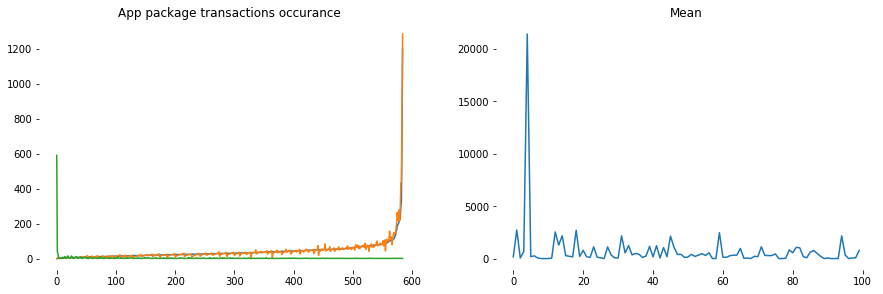

In [253]:
x = dataFrame.groupby(['source_app_packages', 'remote_app_packets']).size().reset_index(name="Time")
y = ds.getMean()

fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1 ,frameon=False); plt.plot(x); plt.title("App package transactions occurance")
plt.subplot(2,2,2 ,frameon=False); plt.plot(y.head(100)); plt.title("Mean")
print(y)

Text(0.5, 1.0, 'Median')

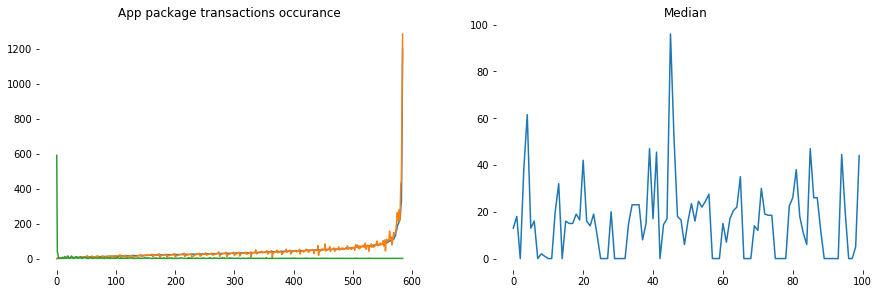

In [266]:
x = dataFrame.groupby(['source_app_packages', 'remote_app_packets']).size().reset_index(name="Time")
y = ds.getMedian()

fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1 ,frameon=False); plt.plot(x); plt.title("App package transactions occurance")
plt.subplot(2,2,2 ,frameon=False); plt.plot(y.head(100)); plt.title("Median")


